In [1]:
import pandas as pd
import numpy as np


In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

# print("Path to dataset files:", path)

In [3]:
# houses = pd.read_csv(path +'/housing_prices_dataset.csv')
# houses.head()

In [4]:
houess = pd.read_csv('Housing.csv')

In [5]:
houess.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
houess.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
221,4767000,3420,4,2,2,yes,no,no,no,no,0,no,semi-furnished
512,2520000,3000,2,1,2,yes,no,no,no,no,0,no,furnished
109,6090000,6615,4,2,2,yes,yes,no,yes,no,1,no,semi-furnished
321,4025000,3630,3,2,2,yes,no,no,yes,no,2,no,semi-furnished
58,7210000,7680,4,2,4,yes,yes,no,no,yes,1,no,semi-furnished


In [7]:
houess.shape

(545, 13)

In [8]:
houess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
houess.describe()
houess.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
houess=houess[['area', 'price', 'bedrooms', 'bathrooms', 'parking', 'airconditioning']]
houess.head()

,area,price,bedrooms,bathrooms,parking,airconditioning
0,7420,13300000,4,2,2,yes
1,8960,12250000,4,4,3,yes
2,9960,12250000,3,2,2,no
3,7500,12215000,4,2,3,yes
4,7420,11410000,4,1,2,yes


<h1>Simple Linear Regreesion Model

In [11]:
df=houess[['price','area']]
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Area vs Price')

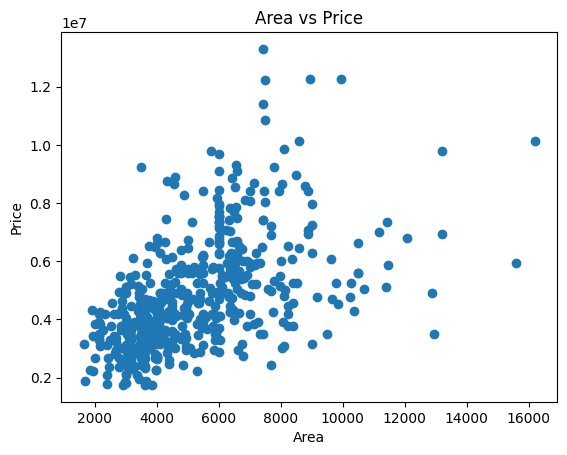

In [13]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price') 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['area']], df['price'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 1), (109, 1), (436,), (109,))

In [15]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(X_train, y_train)
li.coef_, li.intercept_

(array([425.72984194]), np.float64(2512254.2639593435))

In [16]:
li.predict(X_test)

array([5024060.33139816, 5279498.23656143, 4232202.82539203,
       4640903.47365326, 4198144.43803692, 5373158.80178796,
       6139472.51727777, 4636646.17523387, 3891618.951841  ,
       3661724.83719406, 6165016.3077941 , 4187075.46214652,
       4095969.27597162, 3832016.77396957, 4202401.73645631,
       4057653.59019713, 3363713.94783691, 5066633.31559204,
       5002773.83930122, 5066633.31559204, 4649418.07049203,
       5417860.43519154, 4065742.45719396, 4130027.66332672,
       6024525.4599543 , 6752523.48966962, 3827759.47555018,
       3789443.78977569, 8131888.17755128, 3789443.78977569,
       4215173.63171447, 3840531.37080835, 5066633.31559204,
       5328457.16838439, 4545114.25921703, 4470611.53687774,
       4490195.10960693, 3866075.16132467, 3993794.11390631,
       3698763.33344273, 5909578.40263083, 4057653.59019713,
       5245439.84920633, 4300319.60010223, 5385930.69704613,
       5017674.38376908, 5066633.31559204, 4487640.7305553 ,
       5939379.49156655,

In [17]:
model=li.predict([[20]])
model

c:\Users\sande\Desktop\Machine_Learning_Project\Movie_Recommnder_System_Project\.movies\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2520768.86079812])

Text(0.5, 0, 'Area')

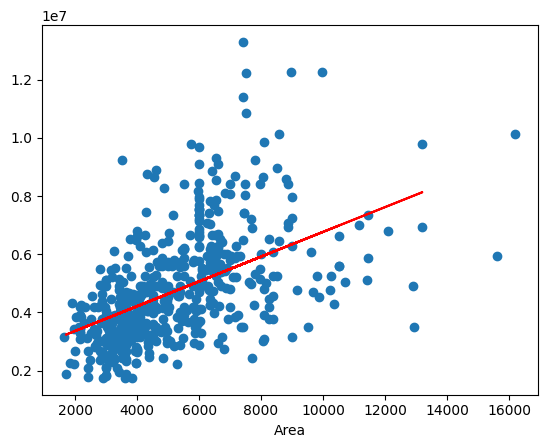

In [18]:
plt.scatter(df['area'], df['price'])
plt.plot(X_test, li.predict(X_test), color='red')
plt.xlabel('Area')

In [19]:
houess['X_aixis']=houess['bedrooms']+houess['bathrooms']+houess['parking']+houess['airconditioning']
houess['X_aixis'].head()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Text(0, 0.5, 'Price')

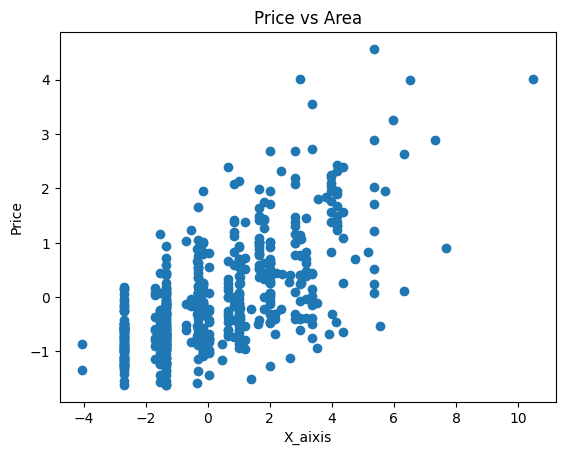

In [ ]:
plt.scatter(houess['X_aixis'], houess['price'])
plt.title('Price vs Area')
plt.xlabel('X_aixis')
plt.ylabel('Price')

In [ ]:
houess.isnull().sum()


area               0
price              0
bedrooms           0
bathrooms          0
parking            0
airconditioning    0
dtype: int64

In [ ]:
print(houess.dtypes)


area                int64
price               int64
bedrooms            int64
bathrooms           int64
parking             int64
airconditioning    object
dtype: object


In [ ]:
houess['airconditioning'] = houess['airconditioning'].map({'yes': 1, 'no': 0})

In [ ]:
# in this case we will use preprssing 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
houess['airconditioning'] = le.fit_transform(houess['airconditioning'])
houess['airconditioning'].unique()

array([1, 0])

In [ ]:
houess.head()

,area,price,bedrooms,bathrooms,parking,airconditioning
0,7420,13300000,4,2,2,1
1,8960,12250000,4,4,3,1
2,9960,12250000,3,2,2,0
3,7500,12215000,4,2,3,1
4,7420,11410000,4,1,2,1


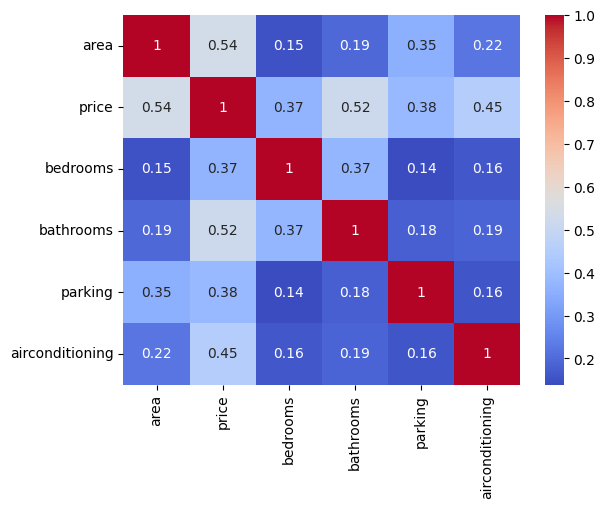

In [ ]:
import seaborn as sns
sns.heatmap(houess.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
houess[['area', 'price', 'bedrooms', 'bathrooms', 'parking']] = scaler.fit_transform(houess[['area', 'price', 'bedrooms', 'bathrooms', 'parking']])
houess.head()

,area,price,bedrooms,bathrooms,parking,airconditioning
0,1.046726,4.566365,1.403419,1.421812,1.517692,1
1,1.757010,4.004484,1.403419,5.405809,2.679409,1
2,2.218232,4.004484,0.047278,1.421812,1.517692,0
3,1.083624,3.985755,1.403419,1.421812,2.679409,1
4,1.046726,3.554979,1.403419,-0.570187,1.517692,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = houess[['area', 'bedrooms', 'bathrooms', 'parking', 'airconditioning']]
y = houess['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.shape)
print(X_test.shape)

(436, 5)
(109, 5)


In [ ]:
X_train


,area,bedrooms,bathrooms,parking,airconditioning
46,0.391790,0.047278,1.421812,0.355976,1
93,0.945257,0.047278,1.421812,2.679409,1
335,-0.615521,-1.308863,-0.570187,1.517692,1
412,-1.171756,0.047278,-0.570187,-0.805741,0
471,-0.645962,0.047278,-0.570187,-0.805741,0
...,...,...,...,...,...
71,0.391790,1.403419,1.421812,-0.805741,1
106,0.138117,1.403419,1.421812,-0.805741,1
270,-0.300045,0.047278,1.421812,0.355976,0
435,-0.512207,-1.308863,-0.570187,-0.805741,0


In [ ]:

li=LinearRegression()

model = li.fit(X_train, y_train)
y_pred = li.predict(X_test)

In [ ]:
y_pred

array([ 0.5811887 ,  0.95431574, -0.77783088,  0.06987477, -0.64898882,
       -0.24030726,  0.87088485,  0.30654573, -0.75639279, -0.83556083,
        2.34511999, -0.79352662, -0.26034661, -0.77633162, -0.64750809,
        0.62680994, -1.07989985,  0.35784431, -0.22923429, -0.48760774,
        0.07283623,  0.34010805, -0.83572743, -0.53278399,  0.405934  ,
        1.1815738 , -0.91850025, -0.1288075 ,  1.56386662, -0.93182683,
        0.58413317, -0.63347365,  0.88027923, -0.25585493, -0.3876214 ,
        0.8128735 , -0.2676177 , -0.05893024, -0.15519623, -0.01965915,
        0.22605777, -0.27367318,  0.9424699 , -0.47355478, -0.37655297,
        0.20012801,  0.88027923, -0.26771475, -0.18405804, -0.6520338 ,
        1.37847996, -0.79193031, -0.08562197, -0.00416174, -0.55568428,
       -0.8044655 ,  0.98315748, -0.87998274, -0.13959908, -0.8133684 ,
        0.03695077, -0.25689066,  0.56210156, -0.07673605, -0.16189356,
       -0.3988104 ,  0.2635675 , -0.79113892,  0.56883286,  0.45

Text(0.5, 0, 'Actual Prices')

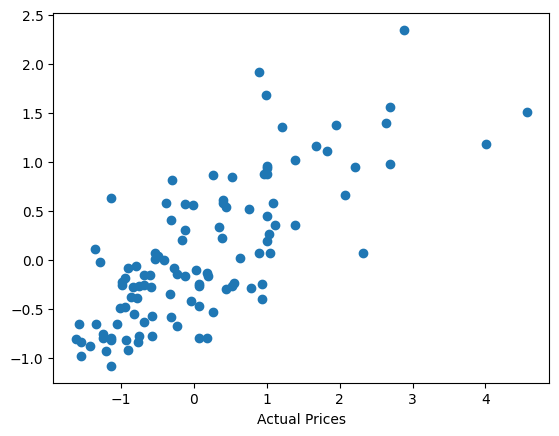

In [ ]:
# Visulization
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Prices')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")


MSE: 0.6542316269177939, R2: 0.5480014097583653


In [ ]:
%pip install pickle 
%pip install streamlit


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pickle

# Save the model to disk
filename = 'housing_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# Load the model from disk

Note: you may need to restart the kernel to use updated packages.


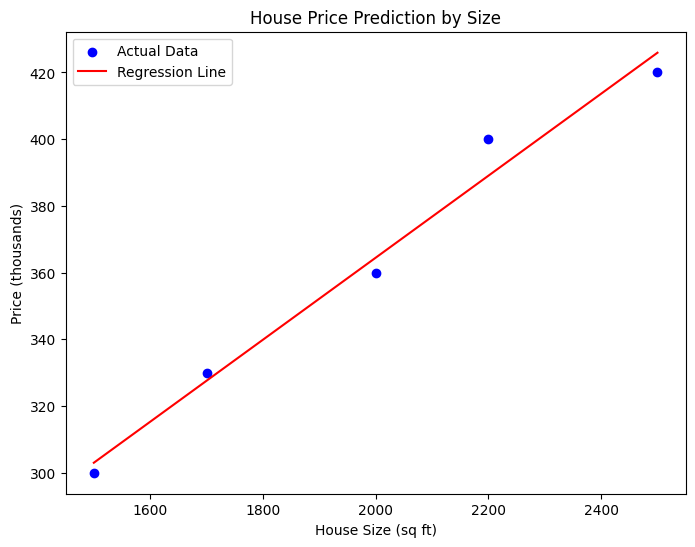

In [ ]:
%pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm/

# -------- Dataset --------
# Example: House sizes (independent variable) and prices (dependent variable)
sizes = np.array([1500, 1700, 2000, 2200, 2500]).reshape(-1, 1)
prices = np.array([300, 330, 360, 400, 420])

# -------- Build the Model --------
model = LinearRegression()
model.fit(sizes, prices)
y_pred = model.predict(sizes)

# -------- Scatter Plot with Regression Line --------
plt.figure(figsize=(8, 6))
plt.scatter(sizes, prices, color='blue', label='Actual Data')
plt.plot(sizes, y_pred, color='red', label='Regression Line')
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price (thousands)")
plt.title("House Price Prediction by Size")
plt.legend()
plt.show()

# -------- Residual Plot --------
# # Calculate residuals (Actual - Predicted)
# residuals = prices - y_pred
# plt.figure(figsize=(8, 6))
# plt.scatter(y_pred, residuals, color='purple')
# plt.axhline(0, color='black', linestyle='--')
# plt.xlabel("Predicted Prices")
# plt.ylabel("Residuals")
# plt.title("Residual Plot")
# plt.show()

# -------- Q-Q Plot for Residuals --------
# sm.qqplot(residuals, line='45', fit=True)
# plt.title("Q-Q Plot of Residuals")
# plt.show()


In [ ]:
prices.shape

(5,)